- import modules

In [62]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy
import scipy as sp
import scipy.stats as st
import pandas as pd
import pymc3 as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

## Part-a

- Since the fraction of the population that has covid gives us the success rate of covid cases. So with $p=\gamma$, we have
$$
L(n_p,n_n|X_p,X_n,\gamma,\kappa,\tau) = \prod_{i=1}^N B(\gamma,N,n_p)\\
= \prod_{i=1}^N (1-\gamma)^{I_n}(\gamma)^{I_p}\\
= (1-\gamma)^{n_n}(\gamma)^{n_p}
$$

## Part-b

## Part-c

In [60]:
numpy.random.binomial(10,.5)

7

In [65]:
REPRODUCE_SEED=1
def gibbsSampler(ak,bk,at,bt,ag,bg,nn,np,init_k,init_t,init_g,init_xn,init_xp,err=1e-3,n_iter=1e3):
    """
    function to generate gibbs samples for posterior distribution
    TODO: complete doc for this func
    TODO: implement stopping criterian
    """
    numpy.random.seed(REPRODUCE_SEED)
    
    samples_k=[init_k]
    samples_t=[init_t]
    samples_g=[init_g]
    samples_xn=[init_xn]
    samples_xp=[init_xp]

    curr_err=1e5
    curr_iter=0
    while(curr_iter<n_iter): # and curr_err>err 
        samples_k.append(numpy.random.beta(a=samples_xp[-1]+ak,b=samples_xn[-1]+bk))
        samples_t.append(numpy.random.beta(a=nn-samples_xn[-1]+at,b=np-samples_xp[-1]+bt))
        samples_g.append(numpy.random.beta(a=samples_xn[-1]+samples_xp[-1]+ag,b=nn+np-samples_xn[-1]-samples_xp[-1]+bg))
        
        tmp_pn=(samples_g[-1]*(1-samples_k[-1]))/(samples_g[-1]*(1-samples_k[-1])+(1-samples_g[-1])*samples_t[-1])
        tmp_pp=(samples_g[-1]*samples_k[-1])/(samples_g[-1]*samples_k[-1]+(1-samples_g[-1])*(1-samples_t[-1]))
        samples_xn.append(numpy.random.binomial(n=nn,p=tmp_pn))
        samples_xp.append(numpy.random.binomial(n=np,p=tmp_pp))

        curr_iter+=1
        # print(curr_iter)
        # curr_err=np.abs()
    
    samples_df=pd.DataFrame({'k':samples_k,'t':samples_t,'g':samples_g,'xn':samples_xn,'xp':samples_xp})

    return samples_df

In [66]:
# start for betas : mean/mode
# for binomials: np
samples_d=gibbsSampler(1,1,1,1,1,1,20,80,0.5,0.5,0.5,10,40)

In [75]:
PARA_KEYS=['k','t','g']

arviz - WARNING - Shape validation failed: input_shape: (1, 1001), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1001), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1001), minimum_shape: (chains=2, draws=4)


    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
x  0.761  0.187   0.408    0.999      0.037    0.028      25.0      70.0   

   r_hat  
x    NaN  
    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
x  0.325  0.246   0.001     0.83      0.059    0.042      15.0      75.0   

   r_hat  
x    NaN  
    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
x  0.631  0.247   0.224    0.995      0.065    0.047      15.0      46.0   

   r_hat  
x    NaN  


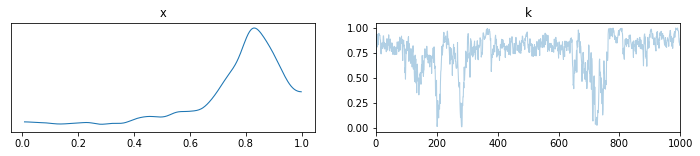

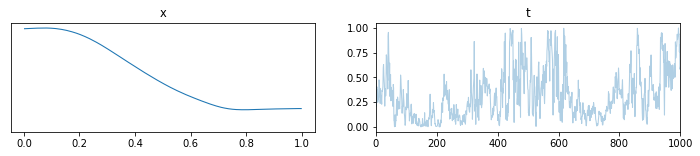

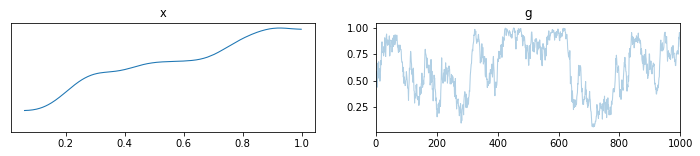

In [81]:
for key in PARA_KEYS:
    print(az.summary(numpy.array(samples_d[key])))
    az.plot_trace(numpy.array(samples_d[key]))
    plt.title(key)


In [83]:
az.summary(numpy.array(samples_d['k']))

arviz - WARNING - Shape validation failed: input_shape: (1, 1001), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.761,0.187,0.408,0.999,0.037,0.028,25.0,70.0,NaN


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

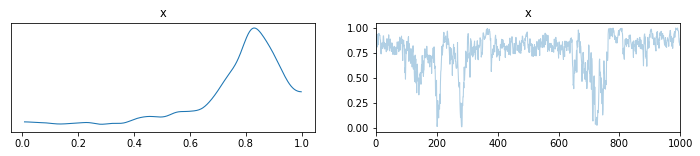

In [89]:
az.plot_trace(numpy.array(samples_d['k']))

In [4]:
def covid(ak,bk,at,bt,ag,bg,N,np):
    with pm.Model() as mod:
        k = pm.Beta('k', ak, bk)
        t = pm.Beta('t', at, bt)
        g = pm.Beta('g', ag, bg)
        w = pm.Binomial('w',n=N, p=g, observed=np)
        trc=pm.sample(3000,tune=1000)
    return trc

## Part-d

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [g, t, k]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 6 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'k'}>,
        <AxesSubplot:title={'center':'k'}>],
       [<AxesSubplot:title={'center':'t'}>,
        <AxesSubplot:title={'center':'t'}>],
       [<AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'g'}>]], dtype=object)

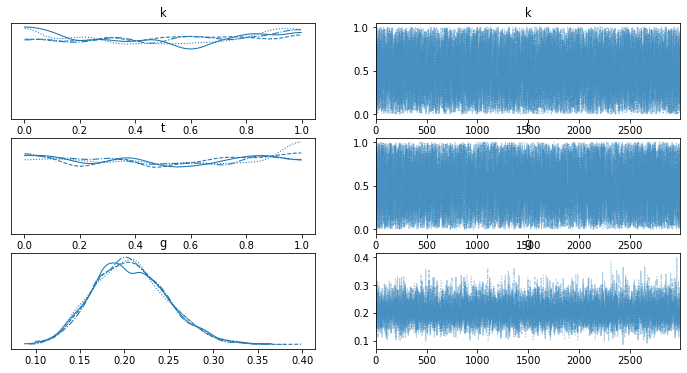

In [8]:
sim4=covid(1,1,1,1,1,1,100,20)


In [10]:

az.summary(sim4)


Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.504,0.293,0.056,1.000,0.003,0.002,10888.0,7562.0,1.0
t,0.502,0.294,0.057,1.000,0.003,0.002,12401.0,8610.0,1.0
g,0.206,0.041,0.134,0.285,0.000,0.000,13462.0,8998.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'k'}>,
        <AxesSubplot:title={'center':'k'}>],
       [<AxesSubplot:title={'center':'t'}>,
        <AxesSubplot:title={'center':'t'}>],
       [<AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'g'}>]], dtype=object)

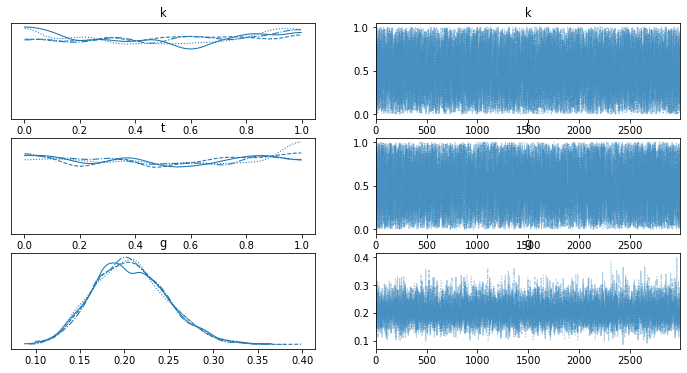

In [11]:

az.plot_trace(sim4)

## Part-e

In [12]:
sim5=covid(10,1,10,1,1,1,100,20)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [g, t, k]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 9 seconds.


In [13]:

az.summary(sim5)


Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.908,0.085,0.748,1.000,0.001,0.001,7280.0,4443.0,1.0
t,0.908,0.084,0.749,1.000,0.001,0.001,7430.0,5091.0,1.0
g,0.206,0.040,0.134,0.282,0.000,0.000,11715.0,8564.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'k'}>,
        <AxesSubplot:title={'center':'k'}>],
       [<AxesSubplot:title={'center':'t'}>,
        <AxesSubplot:title={'center':'t'}>],
       [<AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'g'}>]], dtype=object)

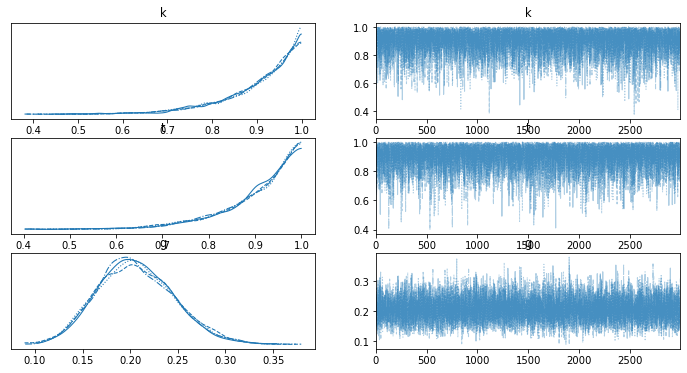

In [14]:

az.plot_trace(sim5)

## Part-f

In [15]:
sim6=covid(1,1,1,1,1,10,100,20)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [g, t, k]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 5 seconds.


In [16]:

az.summary(sim6)


Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.500,0.289,0.040,0.975,0.003,0.002,11992.0,7930.0,1.0
t,0.497,0.292,0.005,0.946,0.003,0.002,10919.0,7330.0,1.0
g,0.189,0.038,0.119,0.259,0.000,0.000,14364.0,8208.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'k'}>,
        <AxesSubplot:title={'center':'k'}>],
       [<AxesSubplot:title={'center':'t'}>,
        <AxesSubplot:title={'center':'t'}>],
       [<AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'g'}>]], dtype=object)

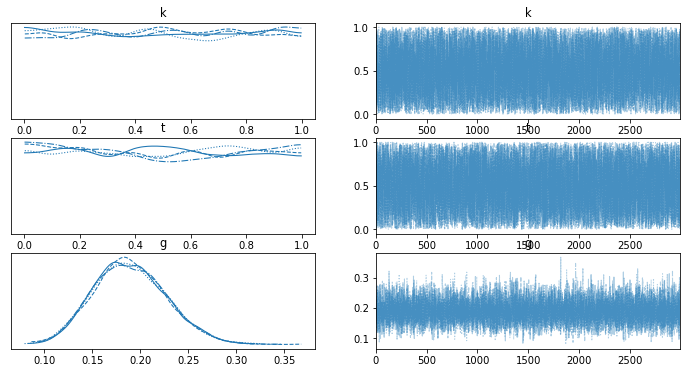

In [17]:

az.plot_trace(sim6)

## Part-g

In [18]:
sim7=covid(1,1,10,1,1,10,100,20)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [g, t, k]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 7 seconds.


In [19]:

az.summary(sim7)


Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.499,0.293,0.018,0.960,0.003,0.002,11187.0,7617.0,1.0
t,0.909,0.083,0.757,1.000,0.001,0.001,8618.0,5888.0,1.0
g,0.189,0.037,0.118,0.257,0.000,0.000,10323.0,7824.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'k'}>,
        <AxesSubplot:title={'center':'k'}>],
       [<AxesSubplot:title={'center':'t'}>,
        <AxesSubplot:title={'center':'t'}>],
       [<AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'g'}>]], dtype=object)

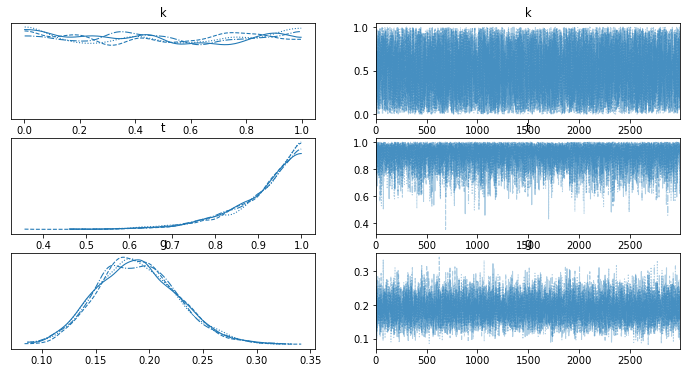

In [20]:

az.plot_trace(sim7)

## Part-h

In [24]:
sim8=covid(1,1,10,1,1,10,1000,200)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [g, t, k]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 6 seconds.


In [25]:

az.summary(sim8)

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.504,0.289,0.047,0.984,0.003,0.002,10667.0,7138.0,1.0
t,0.908,0.085,0.748,1.000,0.001,0.001,8675.0,6092.0,1.0
g,0.199,0.013,0.176,0.222,0.000,0.000,9704.0,8298.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'k'}>,
        <AxesSubplot:title={'center':'k'}>],
       [<AxesSubplot:title={'center':'t'}>,
        <AxesSubplot:title={'center':'t'}>],
       [<AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'g'}>]], dtype=object)

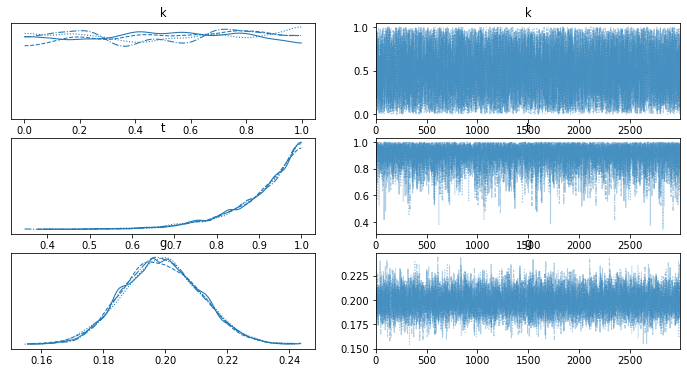

In [26]:
az.plot_trace(sim8)

## Part-i